Zachary Loschinskey

January 2025

Code for the models discussed in Chapter 5 of Bayesian Filtering and Smotthing: Second Edition from Svensson and Sarkka

The car example isn't fleshed out here because code for that can be found on their github: https://github.com/EEA-sensors/Bayesian-Filtering-and-Smoothing/blob/main/python/example_notebooks/car_track.ipynb

In [2]:
using Distributions
using Plots
using LinearAlgebra

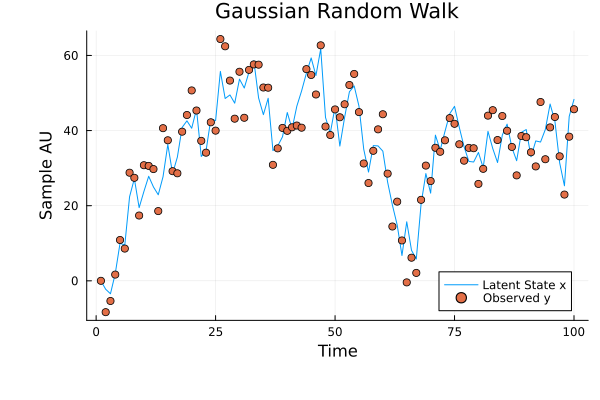

In [70]:
# Define the parameters of the walk
Q = 7.0  # Variance for the dynamics model
R = 5.0  # Variance for the measurement
num_steps = 100

# Define the distributions
q_dist = Normal(0, Q)
r_dist = Normal(0, R)

# Initialize storage for hidden states and observations
x = zeros(num_steps)
y = zeros(num_steps)

for t in 2:num_steps
    x[t] = x[t-1] + rand(q_dist)  # Update the latent state
    y[t] = x[t] + rand(r_dist)    # Generate the observation
end

# Set the figure size and adjust the margins
plot(x, label="Latent State x", size=(600, 400), left_margin=10Plots.mm, bottom_margin=10Plots.mm)
scatter!(y, label="Observed y")

title!("Gaussian Random Walk")
xlabel!("Time")
ylabel!("Sample AU")

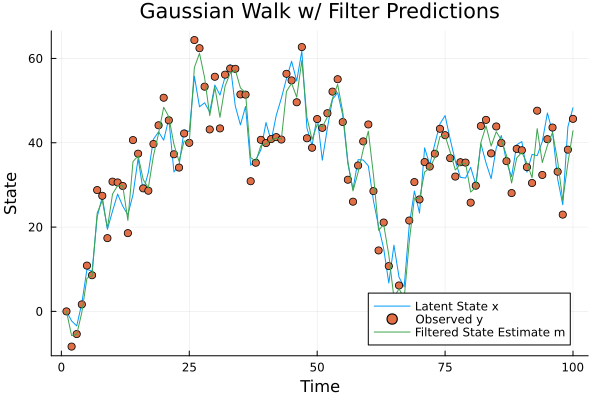

In [74]:
#=
Implement the Kalman filter
=#

# Implement the Kalman filter
timesteps = num_steps
obs_dim = 1  # Since y is a single observation at each time step

# Priors
m₀ = 0.0
P₀ = 1.0

# Dynamics matrix A and noise covariance
A = 1.0
Q = 10.0

# Observation matrix H and noise covariance
H = 1.0
R = 5.0

# Initialize Kalman filter estimates
m = zeros(timesteps)
P = zeros(timesteps)

# Initial estimates
m[1] = m₀
P[1] = P₀

# Kalman filter recursion
for t in 2:timesteps
    # Prediction step
    m_pred = A * m[t-1]
    P_pred = A * P[t-1] * A' + Q

    # Update step
    v = y[t] - H*m_pred
    s = H*P_pred*H' + R
    K = P_pred*H'*inv(s)
    m[t] = m_pred + K*v
    P[t] = P_pred - K*s*K'

end

# Plot the Kalman filter estimates
plot(x, label="Latent State x", size=(600, 400))
scatter!(y, label="Observed y")
plot!(m, label="Filtered State Estimate m")
title!("Gaussian Walk w/ Filter Predictions")
xlabel!("Time")
ylabel!("State")
